In [1]:
%matplotlib inline
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skbio
from sklearn.feature_selection import SelectPercentile
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from skbio.stats.composition import ancom, multiplicative_replacement


/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##Load the mapping file


In [2]:
sample_md = pd.read_csv('map.txt', sep='\t', index_col=0)

##Load the OTU table


In [3]:
home = '/home/office-microbe-files'
table_fp = join(home, 'core_div_out/table_even1000.txt')
table = pd.read_csv(table_fp, sep='\t', skiprows=1, index_col=0, dtype="object")
table.index = table.index.astype(str)

##Filter table and map to the intersection

In [4]:
ids = set(sample_md.index).intersection(table.columns)
table = table[list(ids)]

#City Machine learning

##Create x and Y vectors
Use feature selection  
Split into test and training sets

In [5]:
y = sample_md.loc[ids]['City'].values
X = table.values.T

In [6]:
X = SelectPercentile().fit_transform(X, y)

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   34    66    76 ..., 59308 59309 59310] are constant.
  UserWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Run SVC For city. The Parameters were previously defined as being the best using grid search

In [8]:
clf = SVC(C=0.00079432, kernel='linear', random_state=42)

clf.fit(X_train, y_train)

print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

  flagstaff       0.71      0.72      0.71       116
   sandiego       0.77      0.67      0.71       127
    toronto       0.59      0.68      0.63        92

avg / total       0.70      0.69      0.69       335




In [9]:
clf_dum = DummyClassifier(strategy='most_frequent')
clf_dum.fit(X_train, y_train)

clf.score(X_test, y_test) /clf_dum.score(X_test, y_test)

1.8188976377952757

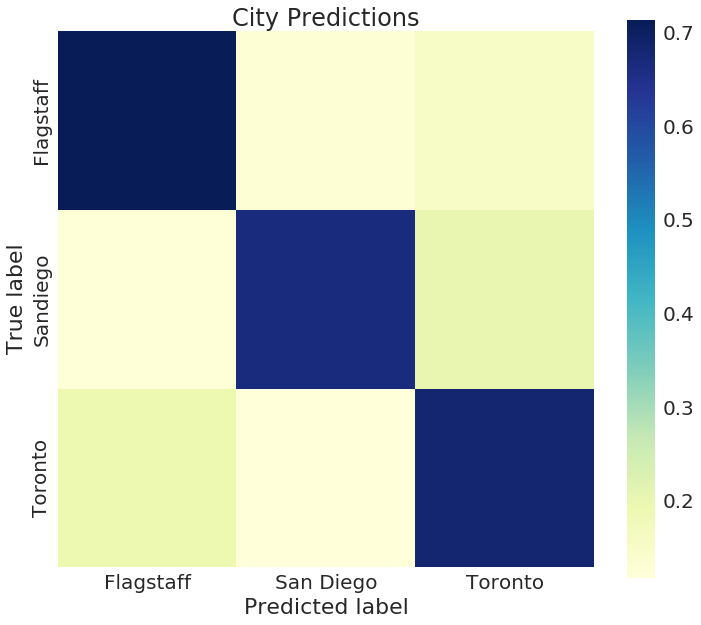

In [10]:
with plt.rc_context(dict(sns.axes_style("darkgrid"),
                         **sns.plotting_context("notebook", font_scale=2))):
    plt.figure(figsize=(12,10))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm, square=True, cmap="YlGnBu")
    ax.set_xticklabels(['Flagstaff', 'San Diego', 'Toronto'])
    ax.set_yticklabels(['Toronto', 'Sandiego', 'Flagstaff'])
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('City Predictions')
    plt.savefig('figure-4-city.svg', dpi=300)
    

#Office Machine learning

In [11]:
y = sample_md.loc[ids]['CityOffice'].values
X = table.values.T

In [12]:
X = SelectPercentile().fit_transform(X, y)

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   34    66    76 ..., 59308 59309 59310] are constant.
  UserWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=422)

In [14]:
clf = SVC(C=0.0001584893192, kernel='linear', random_state=42)

clf.fit(X_train, y_train)

print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.
The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

 flagstaff1       0.21      0.43      0.29        28
 flagstaff2       0.29      0.28      0.28        43
 flagstaff3       0.31      0.29      0.30        35
  sandiego1       0.25      0.34      0.29        44
  sandiego2       0.29      0.12      0.17        33
  sandiego3       0.28      0.26      0.27        31
   toronto1       0.19      0.14      0.16        35
   toronto2       0.19      0.23      0.20        40
   toronto3       0.48      0.30      0.37        46

avg / total       0.28      0.27      0.26       335




In [15]:
clf_dum = DummyClassifier(strategy='most_frequent')
clf_dum.fit(X_train, y_train)

clf.score(X_test, y_test) /clf_dum.score(X_test, y_test)

2.0227272727272729

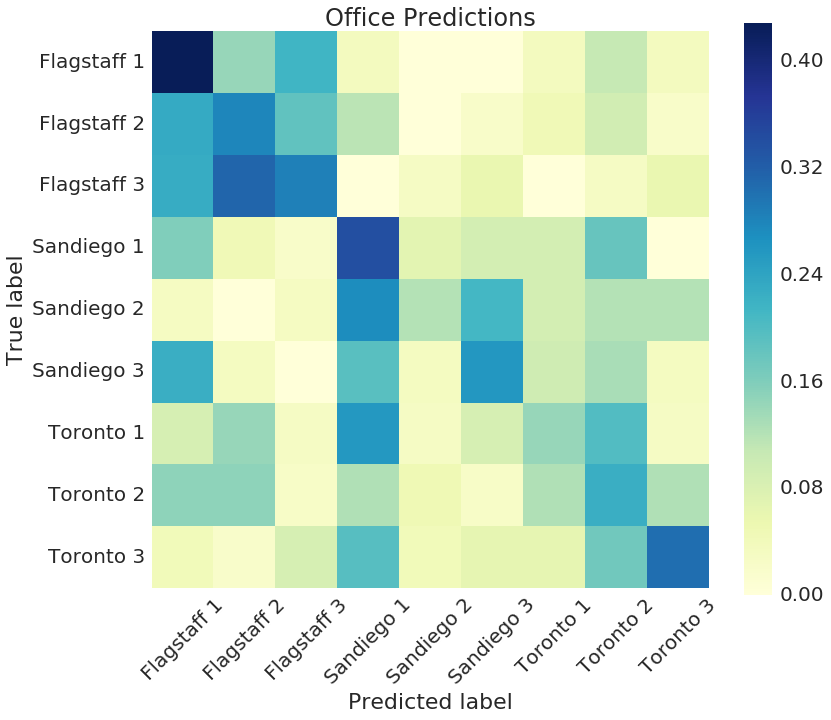

In [16]:
Office_labels = ['Flagstaff 1', 'Flagstaff 2', 'Flagstaff 3', 
                 'Sandiego 1', 'Sandiego 2', 'Sandiego 3',
                 'Toronto 1', 'Toronto 2', 'Toronto 3']

with plt.rc_context(dict(sns.axes_style("darkgrid"),
                         **sns.plotting_context("notebook", font_scale=2))):
    plt.figure(figsize=(12,10))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm, square=True, cmap="YlGnBu")
    ax.set_xticklabels(Office_labels, rotation=45)
    ax.set_yticklabels(Office_labels[::-1], rotation=0)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('Office Predictions')
    plt.tight_layout()
    plt.savefig('figure-4-office.svg', dpi=300)

##Flagstaff only 

In [17]:
flag_md = sample_md[sample_md['City'] == 'flagstaff']
ids = set(flag_md.index).intersection(table.columns)
y = flag_md.loc[table[list(ids)].columns]['CityOffice'].values
X = table[list(ids)].values.T

In [18]:
X = SelectPercentile().fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   10    12    17 ..., 59308 59309 59310] are constant.
  UserWarning)


In [19]:
clf = SVC(C=0.0031622776601, kernel='linear', random_state=42)

clf.fit(X_train, y_train)

print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

 flagstaff1       0.51      0.53      0.52        38
 flagstaff2       0.62      0.56      0.59        41
 flagstaff3       0.54      0.59      0.56        34

avg / total       0.56      0.56      0.56       113




In [20]:
clf_dum = DummyClassifier(strategy='most_frequent')
clf_dum.fit(X_train, y_train)

clf.score(X_test, y_test) /clf_dum.score(X_test, y_test)

1.6578947368421051

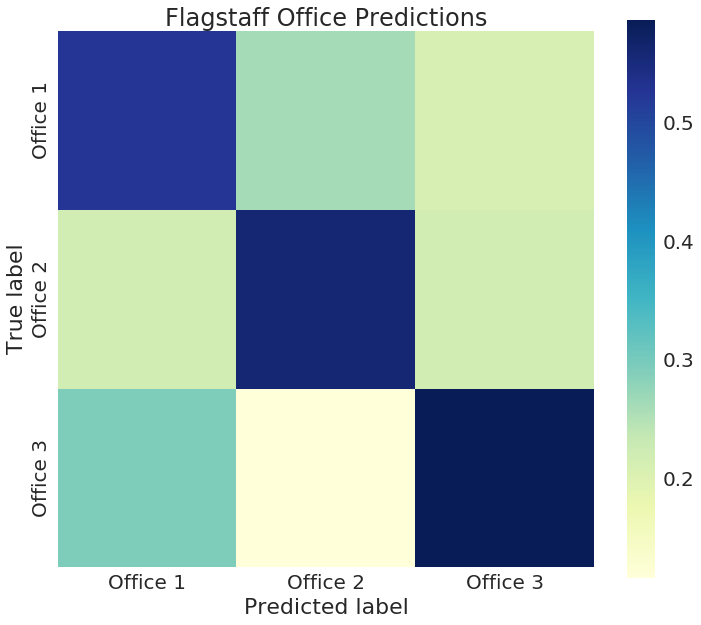

In [21]:
Office_labels = ['1', '2', '3']

with plt.rc_context(dict(sns.axes_style("darkgrid"),
                         **sns.plotting_context("notebook", font_scale=2))):
    plt.figure(figsize=(12,10))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm, square=True, cmap="YlGnBu")
#     ax.set_xticklabels(Office_labels)
#     ax.set_yticklabels(Office_labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticklabels(['Office 1', 'Office 2', 'Office 3'])
    ax.set_yticklabels(['Office 3', 'Office 2', 'Office 1'])

    ax.set_title('Flagstaff Office Predictions')
    plt.savefig('figure-4-flagstaff.svg', dpi=300)

##San Diego

In [22]:
sd_md = sample_md[sample_md['City'] == 'sandiego']
ids = set(sd_md.index).intersection(table.columns)
y = sd_md.loc[table[list(ids)].columns]['CityOffice'].values
X = table[list(ids)].values.T

In [23]:
X = SelectPercentile().fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [    0     6     7 ..., 59308 59309 59310] are constant.
  UserWarning)


In [24]:
clf = SVC(C=1e-2, kernel='linear')

clf.fit(X_train, y_train)

print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

  sandiego1       0.49      0.64      0.56        42
  sandiego2       0.52      0.68      0.59        34
  sandiego3       0.68      0.31      0.43        42

avg / total       0.57      0.53      0.52       118




In [25]:
clf_dum = DummyClassifier(strategy='most_frequent')
clf_dum.fit(X_train, y_train)

clf.score(X_test, y_test) /clf_dum.score(X_test, y_test)

1.5

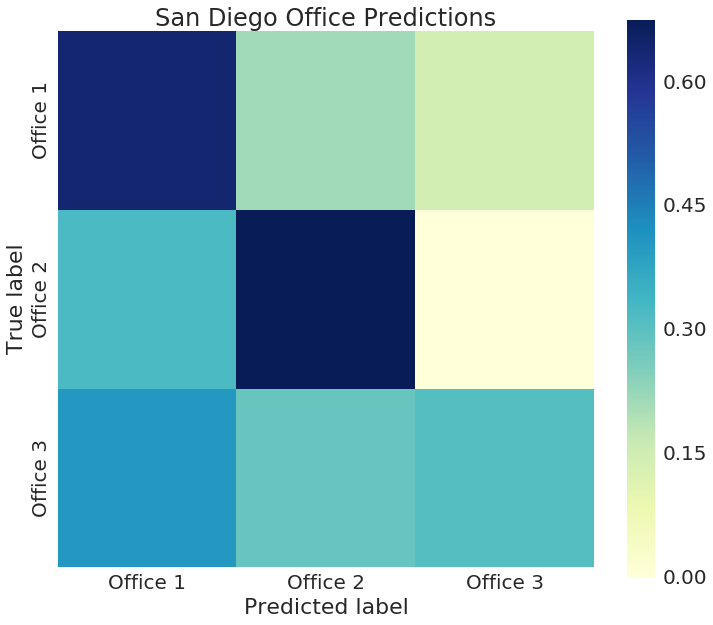

In [26]:
Office_labels = ['1', '2', '3']

with plt.rc_context(dict(sns.axes_style("darkgrid"),
                         **sns.plotting_context("notebook", font_scale=2))):
    plt.figure(figsize=(12,10))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm, square=True, cmap="YlGnBu")
    ax.set_xticklabels(['Office 1', 'Office 2', 'Office 3'])
    ax.set_yticklabels(['Office 3', 'Office 2', 'Office 1'])
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('San Diego Office Predictions')
    plt.savefig('figure-4-sandiego.svg', dpi=300)

Toronto
--------

In [27]:
tor_md = sample_md[sample_md['City'] == 'toronto']
ids = set(tor_md.index).intersection(table.columns)
y = tor_md.loc[table[list(ids)].columns]['CityOffice'].values
X = table[list(ids)].values.T

In [28]:
X = SelectPercentile().fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [    0     7     8 ..., 59308 59309 59310] are constant.
  UserWarning)


In [29]:
clf = SVC(C=1e-2, kernel='linear')

clf.fit(X_train, y_train)

print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

   toronto1       0.68      0.60      0.64        35
   toronto2       0.57      0.70      0.63        30
   toronto3       0.54      0.50      0.52        40

avg / total       0.59      0.59      0.59       105




In [30]:
clf_dum = DummyClassifier(strategy='most_frequent')
clf_dum.fit(X_train, y_train)

clf.score(X_test, y_test) /clf_dum.score(X_test, y_test)

2.0666666666666669

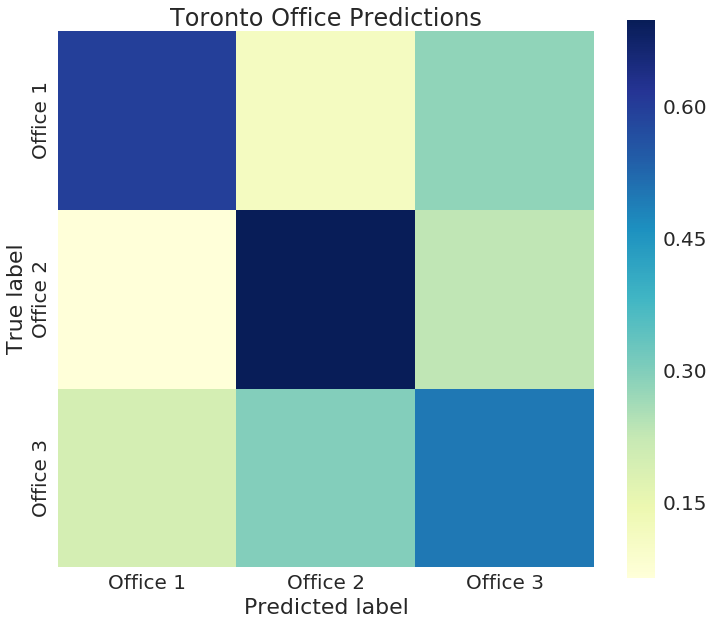

In [31]:
Office_labels = ['1', '2', '3']

with plt.rc_context(dict(sns.axes_style("darkgrid"),
                         **sns.plotting_context("notebook", font_scale=2))):
    plt.figure(figsize=(12,10))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm, square=True, cmap="YlGnBu")
    ax.set_xticklabels(['Office 1', 'Office 2', 'Office 3'])
    ax.set_yticklabels(['Office 3', 'Office 2', 'Office 1'])
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('Toronto Office Predictions')
    plt.savefig('figure-4-toronto.svg', dpi=300)

#ANCOM

In [32]:
pd.options.display.max_colwidth = 200

In [33]:
table_fp = join(home, 'core_div_out/table_even1000.txt')
table = pd.read_csv(table_fp, sep='\t', skiprows=1, index_col=0).T
table.index = table.index.astype(str)
table.columns = table.columns.astype(str)

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
table_ancom = table.loc[:, table.sum(axis=0) > 100]

In [35]:
table_ancom = pd.DataFrame(multiplicative_replacement(table_ancom), index=table_ancom.index, columns=table_ancom.columns)
table_ancom.dropna(axis=0, inplace=True)
intersect_ids = set(sample_md.index).intersection(set(table_ancom.index))
sample_md_ancom = sample_md.loc[intersect_ids, ]
table_ancom = table_ancom.loc[intersect_ids, ]

In [36]:
%%time
results = ancom(table_ancom, sample_md_ancom['City'])

CPU times: user 2min 24s, sys: 54.9 ms, total: 2min 24s
Wall time: 2min 24s


In [37]:
sigs = results[results['reject'] == True]

In [38]:
tax_fp = '/home/office-microbe-files/pick_otus_out_97/uclust_assigned_taxonomy/rep_set_tax_assignments.txt'
taxa_map = pd.read_csv(tax_fp, sep='\t', index_col=0, names=['Taxa', 'none', 'none'])
taxa_map.drop('none', axis=1, inplace=True)
taxa_map.index = taxa_map.index.astype(str)

In [39]:
taxa_map.loc[sigs.sort_values('W').index.astype(str)][:10]

,Taxa
#OTU ID,
New.0.CleanUp.ReferenceOTU503973,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__
4426298,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__
225453,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Alteromonadales; f__Alteromonadaceae; g__Cellvibrio; s__
4332202,k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__
New.0.CleanUp.ReferenceOTU291477,k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__[Weeksellaceae]; g__Chryseobacterium; s__
979315,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__
798634,k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Comamonadaceae; g__; s__
New.0.CleanUp.ReferenceOTU69705,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Alicyclobacillaceae; g__Alicyclobacillus; s__
112194,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__Rickettsiaceae; g__Rickettsia; s__


In [40]:
top_ten = taxa_map.loc[sigs.sort_values('W').index.astype(str)][:10]
top_ten.index = top_ten.index.astype(str)

In [41]:
table_OTUs = table[top_ten.index].copy()/1000
table_OTUs['City'] = sample_md.loc[table_OTUs.index.tolist(), 'City']
table_counts = table_OTUs.groupby('City').describe().unstack().T
table_counts.reset_index(inplace=True)
table_counts = table_counts[table_counts['level_1'].isin(['mean', 'std'])]
table_counts = table_counts.reset_index().set_index('#OTU ID')
table_counts['Taxa'] = taxa_map.loc[table_counts.index, 'Taxa']
table_counts = table_counts.set_index(['Taxa', 'level_1'])
table_counts.drop('index', axis=1, inplace=True)

In [42]:
cols = ['Flagstaff', 'San Diego', 'Toronto']
df_final = pd.DataFrame(columns=cols)
for i in table_counts.index.get_level_values(level=0):
        df_final.loc[i, cols] = ['{0:.{digits}f} +/- {1:.{digits}f}'.format(mean, std, digits=6) for mean, std in zip(table_counts.loc[i, 'mean'].values[0], table_counts.loc[i, 'std'].values[0])]

/home/johnchase/.conda/envs/da/lib/python3.5/site-packages/IPython/kernel/__main__.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.


In [43]:
df_final.index.name = 'Taxa'
df_final

,Flagstaff,San Diego,Toronto
Taxa,,,
k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__Rickettsiaceae; g__Rickettsia; s__,0.000278 +/- 0.000804,0.000119 +/- 0.000500,0.000115 +/- 0.000581
k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Oxalobacteraceae; g__; s__,0.000118 +/- 0.000501,0.000009 +/- 0.000092,0.000019 +/- 0.000137
k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Alteromonadales; f__Alteromonadaceae; g__Cellvibrio; s__,0.000064 +/- 0.000754,0.000147 +/- 0.000956,0.000252 +/- 0.001507
k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__,0.000069 +/- 0.000294,0.000115 +/- 0.000565,0.000019 +/- 0.000154
k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__,0.000036 +/- 0.000404,0.000245 +/- 0.003120,0.000470 +/- 0.003537
k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Comamonadaceae; g__; s__,0.000296 +/- 0.001100,0.000219 +/- 0.001348,0.000106 +/- 0.000627
k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__,0.000051 +/- 0.000333,0.000030 +/- 0.000275,0.000139 +/- 0.000814
k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__[Weeksellaceae]; g__Chryseobacterium; s__,0.000131 +/- 0.001826,0.000138 +/- 0.002168,0.000825 +/- 0.006377
k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Alicyclobacillaceae; g__Alicyclobacillus; s__,0.000022 +/- 0.000148,0.000053 +/- 0.000276,0.000089 +/- 0.000359
